## Intro maskinlæring 

Denne notebooken handler om:
- Lager et fiktivt dataset med 5000 males og 5000 females, med egenskapene høyde, vekt og øyefarge
- Sette dataen inn i Pandas Dataframes, og plotting vha Seaborn biblioteket
- Maskinlæringen gjøres vha Scikit-learn biblioteket 
- Importerer tre maskinlæringsmodeller: Logistisk regressjon, Decision Tree og Support Vector Machine
- Gjør en 5-fold cross-validation med disse modellene

In [2]:
# All imports needed for this project
import pandas as pd
import seaborn as sns
import numpy as np
import random
from statistics import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# To demonstrate a mini-version of the dataset, eight rows of datapoints is created and added to a pandas dataframe

data = {
    "ID": [1,2,3,4,5,6,7,8],
    "Height": [177,187,165,161,175,172,183,159],
    "Weight": [74,89,59,65,69,61,80,57],
    "Eye Color": ["Blue", "Green", "Green", "Brown", "Brown", "Green", "Blue", "Green"],
    "Label": ["Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female"]
}

df_small = pd.DataFrame.from_dict(data)
df_small

,ID,Height,Weight,Eye Color,Label
0,1,177,74,Blue,Male
1,2,187,89,Green,Male
2,3,165,59,Green,Female
3,4,161,65,Brown,Female
4,5,175,69,Brown,Male
5,6,172,61,Green,Female
6,7,183,80,Blue,Male
7,8,159,57,Green,Female


<AxesSubplot:xlabel='Height', ylabel='Weight'>

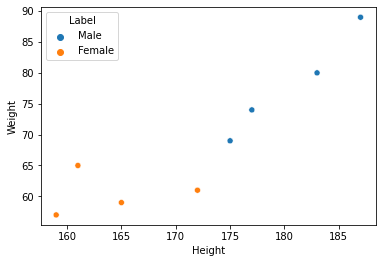

In [4]:
# To plot in 2D, only the columns Height and Weight are used, with different colors for the Label column

sns.scatterplot(data=df_small, x="Height", y="Weight", hue="Label")

In [5]:
# This part is just an algorithm to create the dataset
# Normally, you just import a dataset, not create it like here
# Eye color is chosen at random, while height and weight are chosen based on basic knowledge about males/females

dataset = []
eye_colors = ["Green", "Blue", "Brown"]

# females
for i in range(5000):
    randomness = random.uniform(0, 1.0)
    height = random.randint(150,185)
    if height < 170:
        weight = random.randint(55,75)
    else:
        weight = random.randint(60,85)
    color = random.choice(eye_colors)
    
    # To introduce randomness, 5% of the created females are chosen to be males instead
    if randomness > 0.95:
        dataset.append([i, height, weight, color, "Male"])
    else:
        dataset.append([i, height, weight, color, "Female"])

# males 
for i in range(5000):
    randomness = random.uniform(0, 1.0)
    height = random.randint(160,205)
    if height < 185:
        weight = random.randint(60,85)
    else:
        weight = random.randint(75,110)
    color = random.choice(eye_colors)
    
    # To introduce randomness, 5% of the created males are chosen to be females instead
    if randomness > 0.95:
        dataset.append([5000 + i, height, weight, color, "Female"])
    else:
        dataset.append([5000 + i, height, weight, color, "Male"])


In [6]:
# Now we have 5000 rows of females, and 5000 rows of males. Therefore, it is nice to shuffle the dataset a bit
random.shuffle(dataset)

In [7]:
# Here is the finished dataset 
df = pd.DataFrame(dataset)
df.columns = ["ID", "Height", "Weight", "Eye Color", "Label"]
df

,ID,Height,Weight,Eye Color,Label
0,8256,160,84,Brown,Male
1,864,160,58,Brown,Female
2,7199,176,71,Blue,Male
3,3044,172,72,Brown,Male
4,9644,191,103,Brown,Male
...,...,...,...,...,...
9995,8169,191,94,Green,Male
9996,3647,155,75,Blue,Female
9997,396,165,75,Green,Female
9998,7291,195,110,Blue,Female


<AxesSubplot:xlabel='Height', ylabel='Weight'>

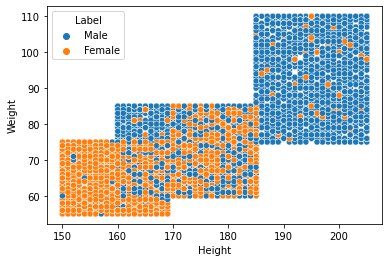

In [8]:
# This plot shows the new dataset with 10000 persons
sns.scatterplot(data=df, x="Height", y="Weight", hue="Label")

In [9]:
# We only want to focus on the features "Height" and "Weight"
# X will be the features that the model will train on,
# while y will be the target (the column that the model will learn to classify new persons as)
X, y = df[["Height", "Weight"]], df["Label"]

In [10]:
# Here, the three models are imported
# lr, dt, and svm variables are now untrained model
# Random seed is used for reproducability: meaning that if someone else were to run this code, they might get different results
# if they have a different seed. Ensuring that we use a specific seed is therefore important, and the value is sent as 
# an argument to the models

random_seed=42
lr = LogisticRegression(random_state=random_seed)
dt = DecisionTreeClassifier(random_state=random_seed)
svm = SVC(random_state=random_seed)

In [11]:
# The scikit-learn library has a function called cross_val_score that does cross-validation for us
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Here, we specify the following arguments: [the model(lr, dt or svm),
#                                            the data (height, weight columns),
#                                            the labels(male/female column),
#                                            number of folds in k-fold crossvalidation (5 here),
#                                            performance metric (accuracy here)]

score_lr = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for Logistic Regression: {mean(score_lr)}")

score_dt = cross_val_score(dt, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for Decision Tree: {mean(score_dt)}")

score_svm = cross_val_score(svm, X, y, cv=5, scoring="accuracy")
print(f"Accuracy for SVM: {mean(score_svm)}")

Accuracy for Logistic Regression: 0.6768
Accuracy for Decision Tree: 0.697
Accuracy for SVM: 0.6856
